In [1]:
pip install researchpy

Note: you may need to restart the kernel to use updated packages.


norm = normal distribution

In [105]:
import numpy as np 
import pandas as pd
from termcolor import colored
import pylab
import seaborn as sns 
import researchpy as rp
import statsmodels.stats.api as sms #for statistic
from scipy.stats.stats import pearsonr # for correlation 
from scipy.stats import bernoulli, binom, poisson, norm, stats, shapiro
from statsmodels.stats.descriptivestats import sign_test
from statsmodels.stats.proportion import proportions_ztest

In [3]:
# people from ages 0-80 years old
population = np.random.randint(0,80,10000) 
population[0:10]

array([33, 12, 41, 27, 45, 75, 58, 75, 16, 40])

**seed() is a function for the first structure from np.random(). in to next steps after that, will be same structure...**

In [4]:
np.random.seed(115) 
samples = np.random.choice(a = population, size = 100)  
samples[0:10]

array([70, 22, 17, 20, 76, 18,  0, 25, 45,  6])

In [5]:
print(colored("\033[1m" +"Samples : ", "blue"), samples.mean())
print(colored("\033[1m" +"Population : ", "blue"), population.mean()) 

Samples :  39.83
Population :  39.1272


In [6]:
# a dataset from seaborn 
df = sns.load_dataset("tips")
df.head() 

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


**"researchpy" gives us more meaningful result**

In [8]:
# for numerical values 
rp.summary_cont(df[["total_bill", "tip", "size"]])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,total_bill,244.0,19.7859,8.9024,0.5699,18.6633,20.9086
1,tip,244.0,2.9983,1.3836,0.0886,2.8238,3.1728
2,size,244.0,2.5697,0.9511,0.0609,2.4497,2.6896


In [9]:
# for categorical values 
rp.summary_cat(df[["sex", "smoker", "day"]])

,Variable,Outcome,Count,Percent
0,sex,Male,157,64.34
1,,Female,87,35.66
2,smoker,No,151,61.89
3,,Yes,93,38.11
4,day,Sat,87,35.66
5,,Sun,76,31.15
6,,Thur,62,25.41
7,,Fri,19,7.79


In [10]:
print(colored("\033[1m" +"Covariance : ", "blue"),"\n", df[["total_bill", "tip"]].cov())
print(colored("\033[1m" +"Correlation : ", "blue"),"\n", df[["total_bill", "tip"]].corr())

Covariance :  
             total_bill       tip
total_bill   79.252939  8.323502
tip           8.323502  1.914455
Correlation :  
             total_bill       tip
total_bill    1.000000  0.675734
tip           0.675734  1.000000


In [11]:
prices = np.random.randint(10,100,1000) 
prices.mean() 

53.97

 **this prices are the customers who paid those price for the product with 95% confidence interval.  The other 5% want to paid diff price this product.** 

In [12]:
sms.DescrStatsW(prices).tconfint_mean() 

(52.32869794836233, 55.611302051637665)

In [20]:
# Using Binom : 

p = 0.01
n = 100
rv = binom(n,p)
print(colored("\033[1m" +"Probability for 1 : ", "blue"), rv.pmf(1))
print(colored("\033[1m" +"Probability for 5 : ", "blue"), rv.pmf(5))
print(colored("\033[1m" +"Probability for 10 : ", "blue"), rv.pmf(10)) #0.00000007.....

Probability for 1 :  0.36972963764972666
Probability for 5 :  0.002897787123761478
Probability for 10 :  7.006035693977194e-08


In [25]:
# Using Poisson : 

lambda_ = 0.1 #mean of error numbers
rv = poisson(mu=lambda_) # mu for lambda and create a poisson 
print(colored("\033[1m" +"Poisson : ", "blue"), rv.pmf(k=0))
print(colored("\033[1m" +"Poisson : ", "blue"), rv.pmf(k=3))
print(colored("\033[1m" +"Poisson : ", "blue"), rv.pmf(k=5))

Poisson :  0.9048374180359595
Poisson :  0.00015080623633932676
Poisson :  7.54031181696634e-08


In [31]:
# Using Normal Distribution : 
1-norm.cdf(90, 80, 5) # 90= desired value 80= mean 5= standart dev. 
print(colored("\033[1m" +"More than 90:","blue"), 1-norm.cdf(90, 80, 5))
print(colored("\033[1m" +"More than 70:","blue"), 1-norm.cdf(70, 80, 5))
print(colored("\033[1m" +"Lower than 73:", "blue"), norm.cdf(73, 80, 5))
print(colored("\033[1m" +"Between 85-90:", "blue"), norm.cdf(90, 80,5) - norm.cdf(85, 80, 5))


More than 90: 0.02275013194817921
More than 70: 0.9772498680518208
Lower than 73: 0.08075665923377107
Between 85-90: 0.13590512198327787


´**Product Purchase :**

In [32]:
measured = np.array([17, 160, 234, 149, 145, 107, 197, 75, 201, 225, 211, 119, 
              157, 145, 127, 244, 163, 114, 145,  65, 112, 185, 202, 146,
              203, 224, 203, 114, 188, 156, 187, 154, 177, 95, 165, 50, 110, 
              216, 138, 151, 166, 135, 155, 84, 251, 173, 131, 207, 121, 120])

In [35]:
stats.describe(measured)

DescribeResult(nobs=50, minmax=(17, 251), mean=154.38, variance=2578.0363265306123, skewness=-0.32398897278694483, kurtosis=-0.05849823498415985)

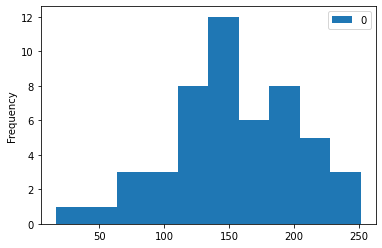

In [39]:
# Check One Sample T Test 

pd.DataFrame(measured).plot.hist();

In [95]:
from scipy import stats # I take an error like : scipy.stats.stats has no attribute modul Probplot. 
# it has a one stats on that codes. 

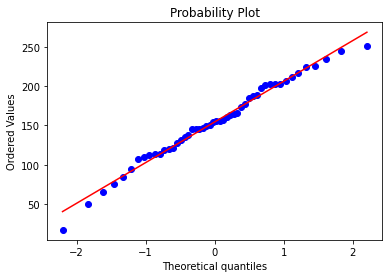

In [52]:
stats.probplot(measured, dist="norm", plot=pylab); 

In [55]:
# Shapiro-Wilks Test 

shapiro(measured)
print(colored("\033[1m" +"T Statistic : ", "blue"), shapiro(measured)[0])
print(colored("\033[1m" +"Calculated P-Value : ", "blue"), shapiro(measured)[1])

T Statistic :  0.9853105545043945
Calculated P-Value :  0.7848747968673706


In [60]:
# Hypothesis :

stats.ttest_1samp(measured, popmean=170) 

Ttest_1sampResult(statistic=-2.1753117985877966, pvalue=0.034460415195071446)

In [65]:
# One Sample Ratio Test 

count = 40
nobs = 500 # number of observation
value = 0.125 # H0 and H1 hypothesis 
proportions_ztest(count, nobs, value ) # 

(-3.7090151628513017, 0.0002080669689845979)

In [86]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,25,21,18,24,26,33,26,27,28,19,25])
B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,32,33,33,33,31,32,33,26,32,33,29])
A_B = pd.concat([A, B], axis = 1)
A_B.columns = ["A","B"]
A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


   Income Group
0      30     A
1      27     A
2      21     A
3      27     A
4      29     A 
     Income Group
25      33     B
26      26     B
27      32     B
28      33     B
29      29     B


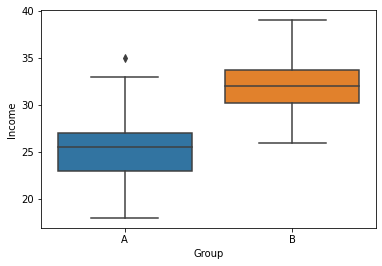

In [87]:
group_A = pd.DataFrame(np.arange(len(A)))
group_B = pd.DataFrame(np.arange(len(B)))
group_A[:] = "A"
group_B[:] = "B"
A = pd.concat([A, group_A], axis=1)
B = pd.concat([B, group_B], axis=1)
AB = pd.concat([A,B])
AB.columns = ["Income", "Group"]
print( AB.head(), "\n", AB.tail())
sns.boxplot(x="Group", y ="Income", data = AB);

In [99]:
# Independent 2 Samples T Test : 
shapiro(A_B.A)  # normalization for A 

# Varianca Homogeneous Assumption : 
stats.levene(A_B.A, A_B.B)

stats.ttest_ind(A_B["A"],A_B["B"], equal_var= True ) # p-value > 0.05

Ttest_indResult(statistic=-7.028690967745927, pvalue=2.6233215605475075e-09)

In [102]:
# Effect Education Sample :

before = pd.DataFrame([123,119,119,116,123,123,121,120,117,118,121,121,123,119,121,118,124,121,125,115,115,119,118,121,117,117,120,120,121,117,118,117,123,118,124,121,115,118,125,115])
after = pd.DataFrame([118,127,122,132,129,123,129,132,128,130,128,138,140,130,134,134,124,140,134,129,129,138,134,124,122,126,133,127,130,130,130,132,117,130,125,129,133,120,127,123])

In [104]:
print( before[0:5], "\n", after[0:5])

     0
0  123
1  119
2  119
3  116
4  123 
      0
0  118
1  127
2  122
3  132
4  129


In [108]:
# 2 Samples Ratio Test :

num_succes = np.array([300, 250])
num_observation = np.array([1000, 1100])
proportions_ztest(count = num_succes, nobs= num_observation) # to reject hypothesis 

(3.7857863233209255, 0.0001532232957772221)